# HW6: Engineering Thermodynamics 

What is our goal? 

Ouyr goals is to make three tutorial examples [PyCalphad](https://pycalphad.org/docs/latest/) available as a homeworks assignment. 

To be defined. 

## Import Libraries

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.20.1
Succesfully imported scipy -- Version: 1.6.2
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1/: Conversation Anna/Domenico/Bijoy 

Part (1/4)

Anna: Debye and Einstein models for crystals: The students are provided with experimental low temperature Cp data and they have to write a code in python to fit the data with a Debye and Einstein model. Subsequently they have to derive the entropy at 298 K. This project requires the use of Python and thus knowledge from the ANM course.

Domenico: data? Can data be provided as an Excell sheet, CVS format, data frame or any other format?\

Domenico: does linear regression suffice here? how to deal with outliers? perform interpolation and extrapolation? computate confidence intervals for the data? 

Domenico: Debye and Einstein model? using predefined polynomial or other basis functions? linear or non-linear least squares fit? 

Domenico: entropy: how to compute? 

Part (2/4)

Anna: CALPHAD modelling of liquids: The students are provided with a starting thermodynamic model for a system that is not optimized, together with experimental data. They have to optimize the Gibbs energy interaction parameters to fit as best as possible the experimental data on the system. This requires the use of the FactSage software (license available at RST).

Domenico: optimize? using least squares cost functional? optimization method? search direction computation? regularization? uniqueness of the answer?  

Domenico: data? Excell/CVS/data-frame/other? 

Domenico: CALPHAD and FactSage: what functionality is required (see wikki)? Can it be replaced by public domain tool (e.g. OpenCalphad or PyCalphad)?

Part (3/4)

Anna: Thermodynamic properties of liquids from RDF: The students are provided with RDF data, and they have to write a python code to derive coordination numbers and thermodynamic data. This project requires the use of Python and thus knowledge from the ANM course.

Domenico: data? Excell/CVS/data-frame/other? RDF? 

Part (4/4)

Anna: molecular simulations of liquids/gases: The students are provided with MD models and should derive thermodynamic properties

Domenico: please provide more details. What kind of MD models? Similar to Grozema? How should results of MD simulations be post-processed to obtain relevant results? Are these non-linear least squares problems? Examples or tutorials?  



## Section 2:/ Forward Model 

The code that follows was taken from [notebook.community](https://notebook.community/hwagit/jupyter-notebooks/mod-phase-trans-metals-alloys/tmt4260_exercise1).

In [14]:
R = 8.314472  # [J/(mol K)]
theta_ECu = 244  # [K]
theta_DCu = 315  # [K]


def debye_integrand(x):
    return x**4*(np.exp(x)/(np.exp(x) - 1)**2)


def heat_capacity(T, theta, model='debye'):
    if model=='debye':
        C_V = [9*R*(i/theta)**3*scipy.integrate.quad(debye_integrand, 0, theta/i)[0] for i in T]
    else:
        C_V = [3*R*(theta/i)**2*(np.exp(theta/i)/(np.exp(theta/i) - 1)**2) for i in T]
    return C_V

In [15]:
C_V_exp = np.array([3.74, 6.14, 8.58, 10.83, 12.80, 14.49, 15.91, 18.11, 19.65, 20.78, 21.59,
                    22.23, 22.72, 23.07, 23.36, 23.58, 23.74, 24.02, 24.23, 24.44, 24.58,
                    24.70, 24.79, 24.87, 24.94, 25.03, 25.15, 25.30, 25.57, 25.98, 26.22,
                    26.80])
T_exp = np.array([40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280,
                  300, 350, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000, 1100, 1200,
                  1250, 1300])

# Declare T values from 20 to 400
T = np.linspace(20, 400, 400 - 20 + 1)
threeR = np.full(len(T), 3*R)

In [16]:
C_V_E = heat_capacity(T, theta_ECu, model='einstein')
C_V_D = heat_capacity(T, theta_DCu)

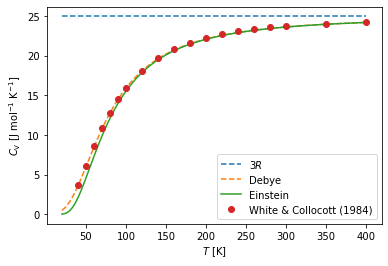

In [17]:
fig, ax = plt.subplots()
ax.plot(T, threeR, '--', label='$3R$')
ax.plot(T, C_V_D, '--', label='Debye')
ax.plot(T, C_V_E, label='Einstein')
ax.plot(T_exp[:19], C_V_exp[:19], 'o', label='White & Collocott (1984)')
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$C_\mathrm{V}$ [J mol$^{-1}$ K$^{-1}$]')
ax.legend()

## Section 3:/ Least-Squares Fit 

In [ ]:
# compute mismatch between model and data at time instance  
def fun(x, t, y):
     return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([1.0, 1.0, 0.0])

In [ ]:
res_lsq = scipy.optimize.least_squares(fun, x0, args=(t_train, y_train),verbose=2)

## References 

To be extended.

1. [wikki on Computational_thermodynamics](https://en.wikipedia.org/wiki/Computational_thermodynamics) : interesting for the links it provides; 
2. [wiki on Calphad](https://en.wikipedia.org/wiki/CALPHAD) 
3. [PyCalphad](https://pycalphad.org/docs/latest/)
4. [OpenCalphad](http://www.opencalphad.com)